In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

In [2]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [4]:
## 创建数据
X1, y1 = make_gaussian_quantiles(cov=2,
                                n_samples=200,n_features=2,
                                n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                n_samples=300, n_features=2,
                                 n_classes=2, random_state=1)

X = np.concatenate((X1, X2))
y = np.concatenate((y1, -y2 + 1))

In [5]:
## 模型构建
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                        algorithm="SAMME.R",
                        n_estimators=200)

## 训练模型
bdt.fit(X, y)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)

In [6]:
## 创建模拟数据，并预测
plot_step = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

## 预测结果
Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])

## 设置
Z = Z.reshape(xx.shape)

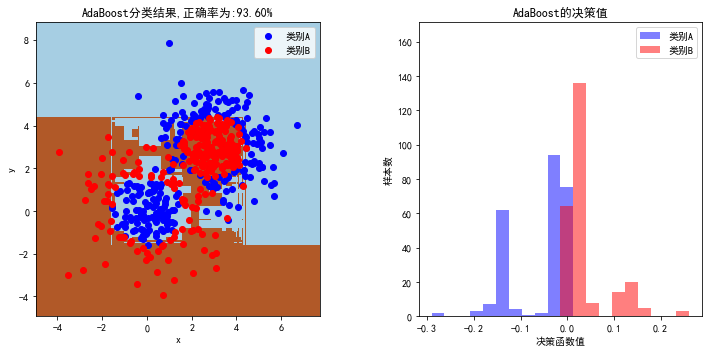

In [8]:
## 画图
plot_colors = "br"
class_names = "AB"

plt.figure(figsize=(10,5), facecolor='w')

# 局部子图
plt.subplot(121)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired) # 预测值的显示（区域的显示）
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
               c=c, cmap=plt.cm.Paired,
               label="类别%s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc = 'upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('AdaBoost分类结果,正确率为:%.2f%%' % (bdt.score(X, y) * 100))

# 局部子图（决策评分图）
## 获取决策函数值
twoclass_output = bdt.decision_function(X)
## 获取范围
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    ## 直方图
    plt.hist(twoclass_output[y == i],
            bins=20,
            range=plot_range,
            facecolor=c,
            label='类别%s' % n,
            alpha=.5)
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('样本数')
plt.xlabel('决策函数值')
plt.title('AdaBoost的决策值')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()